# Group 2 Water Quality in Phoenix Metro Area
## Julie Wyrick, Rachel Groves, Hans Engelbrecht, Brian Parish

### Data for this presentation was sourced from the following study at ASU

https://sustainability.asu.edu/caplter/data/view/knb-lter-cap.617/

In [87]:
#Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib import style
import requests
import gmaps
from scipy.stats import linregress
from config import gkey 

import datetime

#Setup Maps
gmaps.configure(api_key=gkey)

# Input data files
WaterQuarterly = "Resources/QuarterlyLakeSamplingVersionProject.csv"
carbon = "Resources/Carbon.csv"
arsenic = "Resources/arsenic.csv"
algae = "Resources/algae.csv"
metals = "Resources/quarterlyMetals.csv"
nitrogen = "Resources/nutrients.csv"

metals = pd.read_csv(metals)
arsenic = pd.read_csv(arsenic)
algae = pd.read_csv(algae)
nitrogen = pd.read_csv(nitrogen)
carbon_df = pd.read_csv(carbon)
LakeSample= pd.read_csv(WaterQuarterly)
LakeSample =LakeSample.dropna(how="any")

In [32]:
metals = pd.read_csv("Resources/quarterlyMetals.csv")
metals = metals.loc[metals["date"] == "2015-11-04"]
metals = metals.groupby("Site Location").mean()

target_coordinates = "33.448376, -112.074036"
radius = 200000

#Set up parameters for gmaps API
params = {
    "location": "33.448376, -112.074036",
    "keyword": "",
    "radius": radius,
    "key": gkey
}

base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
#create dataframe for the latitude and longitudes of each destination
lake_locations = pd.DataFrame(columns = ["Name", "Lat", "Lng"])
metals=metals.reset_index()
print(f"Reading API from {base_url}")
for site in metals["Site Location"].unique():
    try:
        params["keyword"] = site + " recreational area"
        response_json = requests.get(base_url, params=params).json()
        #pprint.pprint(response_json)
        location = {"Name": site, "Lat": response_json["results"][0]["geometry"]["location"]["lat"],
                   "Lng": response_json["results"][0]["geometry"]["location"]["lng"]}
        lake_locations = lake_locations.append(location,ignore_index=True)
        print(f"Adding {site}")
    except:
        print(f"Could not locate {site}")

Reading API from https://maps.googleapis.com/maps/api/place/nearbysearch/json
Adding Canyon Lake, lower
Adding Canyon Lake, upper
Adding Lake Pleasant integrated sample
Adding Salt River below Saguaro (Blue Point Bridge)
Could not locate Theodore Roosevelt Dam
Could not locate apache lake
Could not locate central arizona project
Could not locate lake havasu state park
Adding theodore roosevelt lake, lower
Adding theodore roosevelt lake, upper
Adding verde river at beeline highway


In [33]:
# Discovered several lakes could not be found by seraching with the google API
# Instead manually searched for coordinates and saved them in a CSV
coordinates = pd.read_csv("Resources/Lakes.csv")
coordinates = coordinates[["Lat","Lng"]]

figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
     'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout, map_type="HYBRID")  # Assign the marker layer to a variable
markers = gmaps.marker_layer(coordinates)
# Add the layer to the map
fig.add_layer(markers)

# Display figure
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [34]:
#Show the CSV file of the carbon CSV data
carbon_df.head()

,site number,site location,Cluster,site acronym,date,sample type,TOC (mg/L),DOC (mg/L),UVA (cm-1),suva (L/mg-m),peak int,peak int WL,int at 450,int at 460,int at 500,FI (450/500),docm comments
0,R5,Verde River btwn Horseshoe and Bartlett,verde,verde abv bartlett,1999,NaN,2.750,2.777,0.0793,0.028556,92.67,446.36,92.45,87.86,52.34,1.766336,NaN
1,R6A,Bartlett Reservoir near outlet,verde,bartlett-epi,1999,NaN,1.934,1.845,0.0406,0.022005,48.65,448.62,48.23,45.52,27.28,1.767962,NaN
2,R6B,Bartlett Reservoir near outlet,verde,bartlett-hypo,1999,NaN,1.735,1.614,0.0412,0.025527,51.89,448.74,51.38,48.71,29.00,1.771724,NaN
3,R7,Verde River below Bartlett Reservoir,verde,verde blw barlett,1999,NaN,1.775,1.626,0.0373,0.022940,47.95,447.02,47.52,44.38,26.25,1.810286,NaN
4,R10,Salt River below Saguaro (Blue Point Bridge),salt,salt blw saguaro,1999,NaN,2.943,2.711,0.0549,0.020251,62.98,446.30,62.62,58.61,34.44,1.818235,NaN


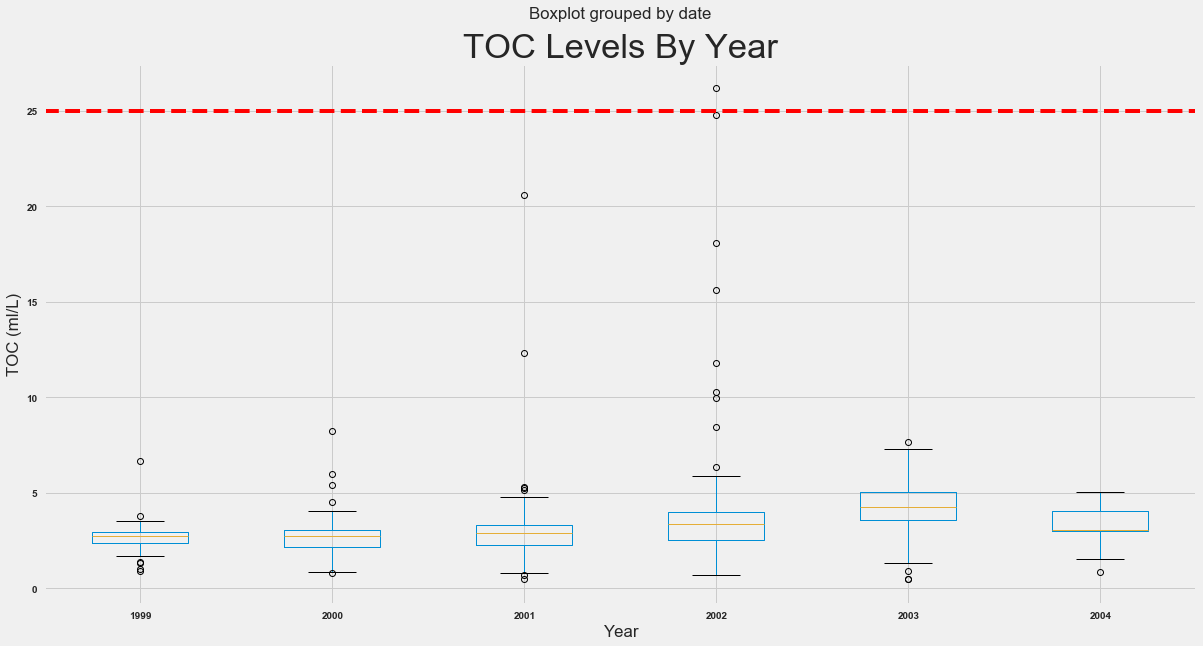

In [85]:
#Only show the columns that you need, and clean up the unknown information
carbon_cleanup = carbon_df [["site number", "site location", "Cluster", "date", "TOC (mg/L)", "DOC (mg/L)", "UVA (cm-1)", "suva (L/mg-m)"]]
carbon_cleanup = carbon_cleanup.dropna()

#Create a scatter plot showing the TOC levels

#carbon_x = carbon_cleanup['date'];
#carbon_y = carbon_cleanup['TOC (mg/L)']

#plt.figure(figsize=(20,18))

carbon_cleanup.boxplot("TOC (mg/L)", by="date", figsize=(20, 10))
font = {'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axhline(y=25, c='red', linestyle='dashed', label="horizontal")
plt.title("TOC Levels By Year")
plt.xlabel('Year');
plt.ylabel('TOC (ml/L)')
plt.style.use('fivethirtyeight')
plt.savefig('Pictures/TOC_levels_1')

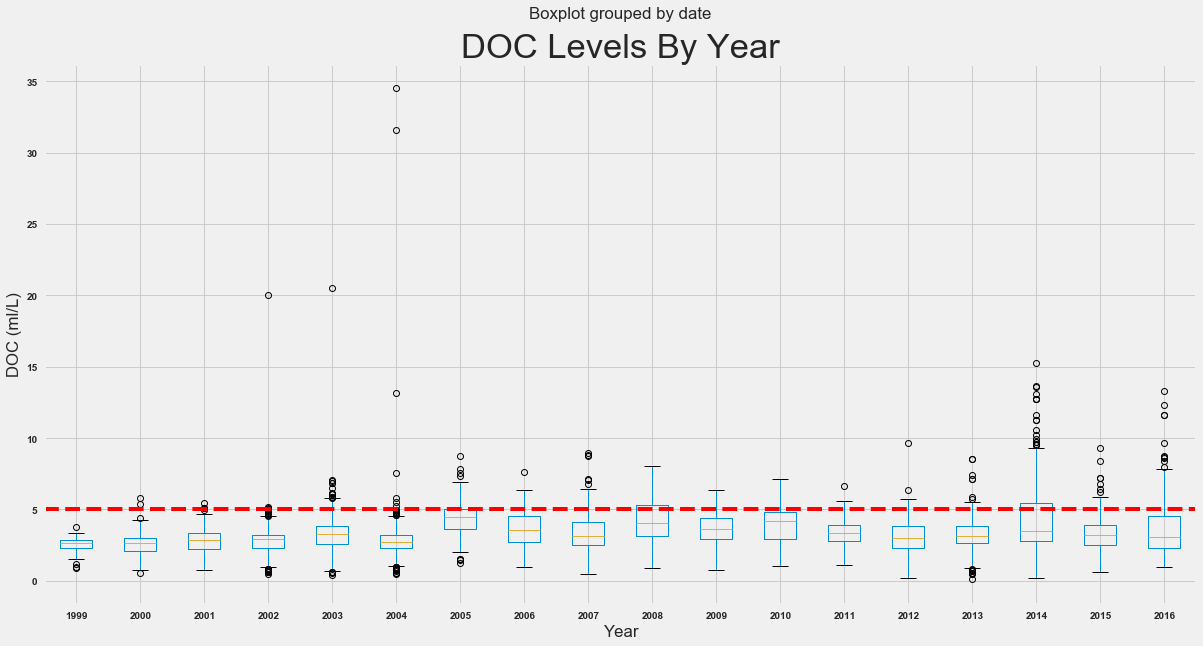

In [83]:
#Cleaning up the data to show the information without the DOC Levels
second_cleanup = carbon_df [["site number", "site location", "Cluster", "date", "DOC (mg/L)", "UVA (cm-1)", "suva (L/mg-m)"]]
second_cleanup = second_cleanup.dropna()

#Create a scatter plot showing the DOC levels

#doc_x = carbon_cleanup['date'];
#doc_y = carbon_cleanup['DOC (mg/L)']

#plt.figure(figsize=(20,18))
second_cleanup.boxplot("DOC (mg/L)", by="date", figsize=(20, 10))
font = {'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.title("DOC Levels By Year")
plt.xlabel('Year');
plt.ylabel('DOC (ml/L)')
plt.axhline(y=5, c='red', linestyle='dashed', label="horizontal")
plt.style.use('fivethirtyeight')
#plt.scatter(doc_x,doc_y)

plt.savefig('Pictures/DOC_levels_1')

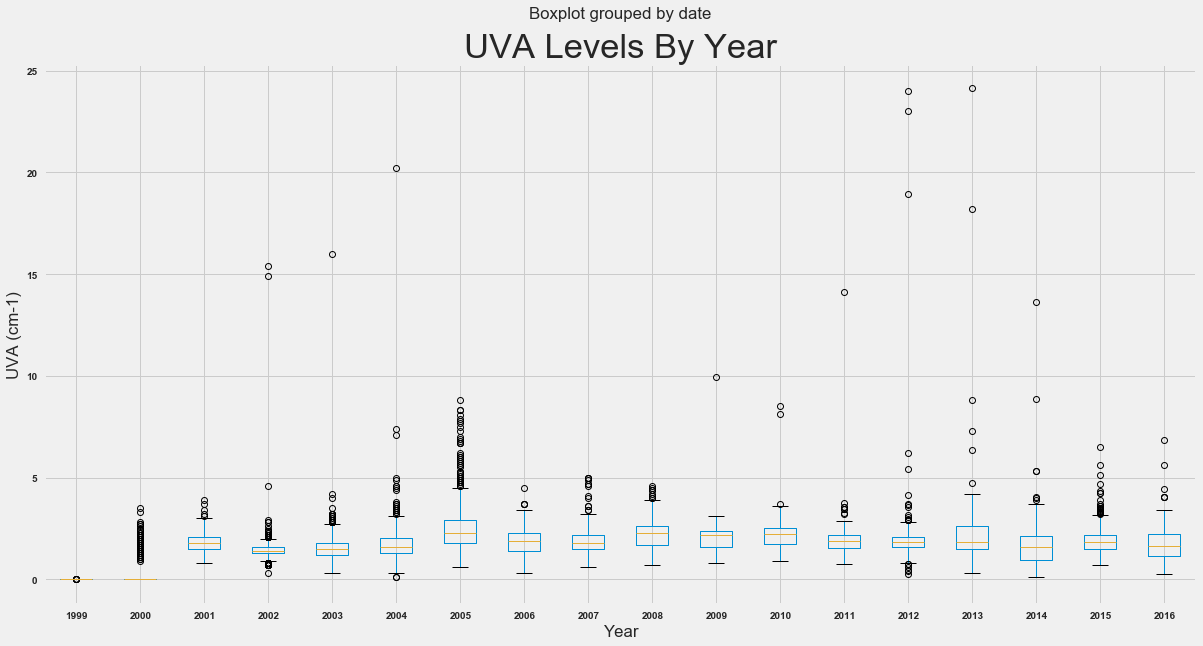

In [81]:
#Creating a scatter plot with the UVA data

#uva_x = second_cleanup['date'];
#uva_y = second_cleanup['UVA (cm-1)']

#plt.figure(figsize=(20,18))
second_cleanup.boxplot("suva (L/mg-m)", by="date", figsize=(20, 10))
font = {'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.title("UVA Levels By Year")
plt.xlabel('Year');
plt.ylabel('UVA (cm-1)')
#plt.axhline(y=5, c='red', linestyle='dashed', label="horizontal")
plt.style.use('fivethirtyeight')
#plt.scatter (uva_x,uva_y)
plt.savefig('Pictures/uva_levels_2')

Number of samples = site number      6317
site location    6317
Cluster          6317
date             6317
DOC (mg/L)       6317
UVA (cm-1)       6317
suva (L/mg-m)    6317
dtype: int64


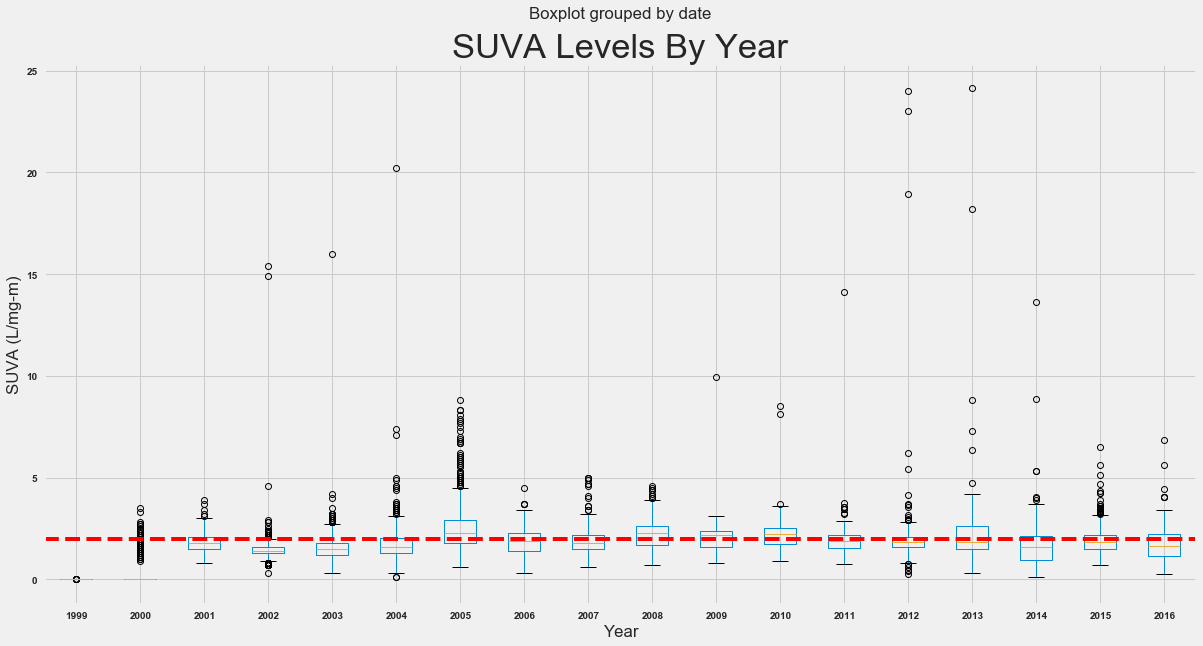

In [86]:

#plt.savefig('uva levels_2')

#Creating a scatter plot with the SUVA data

#suva_x = second_cleanup['date'];
#suva_y = second_cleanup['suva (L/mg-m)']

second_cleanup.boxplot("suva (L/mg-m)", by="date", figsize=(20, 10))
font = {'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
#plt.figure(figsize=(20,18))

plt.title("SUVA Levels By Year")
plt.xlabel('Year')
plt.ylabel('SUVA (L/mg-m)')
plt.axhline(y=2, c='red', linestyle='dashed', label="horizontal")
plt.style.use('fivethirtyeight')
#plt.scatter (suva_x, suva_y)
print(f"Number of samples = {second_cleanup.count()}")

plt.savefig('Pictures/suva_levels_2')

## Conductance in water samples 

### Conductance can be a warning sign of pollution. (If the conductance test was performed accurately with temperature compensation)

In [9]:
LakeStats = LakeSample.loc[:, ["Site Location", "DOC (mg/L)", "TP (ug/L)","Conductance(us/cm)","TDN (mg/L)","date"]]
print(f"Number of rows in LakeStatsL: {str(len(LakeStats))}")
LakeStats.head()

Number of rows in LakeStatsL: 176


,Site Location,DOC (mg/L),TP (ug/L),Conductance(us/cm),TDN (mg/L),date
0,"Apache Lake, upper",5.5,62.0,1102,0.3,2/15/2012
1,"Apache Lake, upper",3.8,14.0,1114,0.3,2/15/2012
2,"Apache Lake, lower",5.5,10.0,1202,0.4,2/15/2012
3,"Apache Lake, lower",3.9,18.0,1101,0.4,2/15/2012
4,"Canyon Lake, upper",3.8,62.0,1102,0.3,2/15/2012


In [10]:

LakeMean=LakeStats.groupby(["Site Location"]).mean()["TDN (mg/L)"]

LakeMedian= LakeStats.groupby(["Site Location"]).median()["TDN (mg/L)"]

LakeVar= LakeStats.groupby(["Site Location"]).var()["TDN (mg/L)" ]

Lakestd= LakeStats.groupby(["Site Location"]).std()["TDN (mg/L)"]

Lakesem= LakeStats.groupby(["Site Location"]).sem()["TDN (mg/L)"]



LakeStats_DF=pd.DataFrame({ "Mean": LakeMean,  
                              "Median": LakeMedian,
                              "Variance":LakeVar,
                               "SD":Lakestd,
                               "SEM":Lakesem})

LakeStats_DF

,Mean,Median,Variance,SD,SEM
Site Location,,,,,
"Apache Lake, lower",0.341999,0.365750,0.006943,0.083323,0.015747
"Apache Lake, upper",0.342731,0.340000,0.009995,0.099977,0.017956
"Canyon Lake, lower",0.363775,0.364670,0.005945,0.077105,0.014077
"Canyon Lake, upper",0.384777,0.380000,0.008418,0.091750,0.016479
"Roosevelt Lake, lower",0.335990,0.340112,0.011481,0.107149,0.020249
"Roosevelt Lake, upper",0.345350,0.309799,0.023803,0.154282,0.029156


In [11]:
#Get the statistics from each of the reservoirs 

LakeMean=LakeStats.groupby(["Site Location"]).mean()["Conductance(us/cm)"]

LakeMedian= LakeStats.groupby(["Site Location"]).median()["Conductance(us/cm)"]

LakeVar= LakeStats.groupby(["Site Location"]).var()["Conductance(us/cm)" ]

Lakestd= LakeStats.groupby(["Site Location"]).std()["Conductance(us/cm)"]

Lakesem= LakeStats.groupby(["Site Location"]).sem()["Conductance(us/cm)"]



LakeStats_DF=pd.DataFrame({ "Mean": LakeMean,  
                              "Median": LakeMedian,
                              "Variance":LakeVar,
                               "SD":Lakestd,
                               "SEM":Lakesem})

LakeStats_DF

,Mean,Median,Variance,SD,SEM
Site Location,,,,,
"Apache Lake, lower",1582.750000,1607.5,80925.379630,284.473865,53.760507
"Apache Lake, upper",1571.677419,1612.0,85721.292473,292.781988,52.585197
"Canyon Lake, lower",1522.266667,1583.5,81985.995402,286.331967,52.276826
"Canyon Lake, upper",1506.709677,1574.0,73422.746237,270.966319,48.666988
"Roosevelt Lake, lower",1651.857143,1609.5,58805.904762,242.499288,45.828058
"Roosevelt Lake, upper",1724.178571,1684.0,52733.411376,229.637565,43.397421


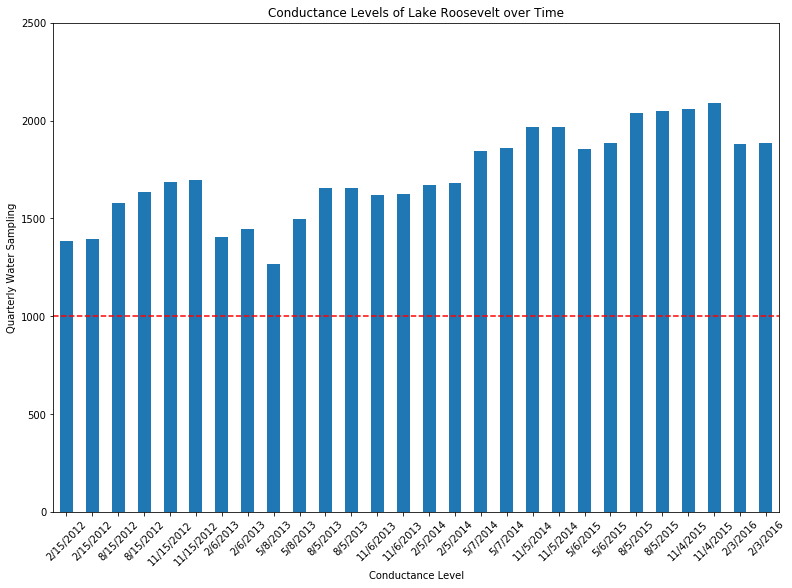

<Figure size 432x288 with 0 Axes>

In [12]:
# Now to chart the Conductance level in one lake over the course of the four years.
LakeStatsRoosevelt= LakeStats.loc[LakeStats["Site Location"] == "Roosevelt Lake, upper"]
LakeStatsRoosevelt

plt.figure(figsize=(13,9)) 
Datapoints = LakeStatsRoosevelt["Conductance(us/cm)"]
Datapoints.plot(kind = "bar")
x_axis = np.arange(len(LakeStatsRoosevelt))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,LakeStatsRoosevelt["date"])
plt.xticks(rotation=45)
plt.title("Conductance Levels of Lake Roosevelt over Time")
plt.xlabel("Conductance Level")
plt.ylabel("Quarterly Water Sampling")
plt.ylim(0,2500)
plt.axhline(y=1000, c='red', linestyle='dashed', label="horizontal")
plt.show()
plt.savefig('Pictures/RooseveltLakeStat.png')

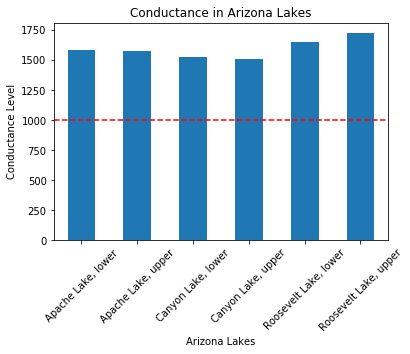

<Figure size 432x288 with 0 Axes>

In [13]:
#Finally to show that what is going on with Roosevelt is not unique to Roosevelt although Roosevelt 
#seems to have the highest level of Conductance for the time period being tested.

Lake_Means= LakeStats_DF['Mean']

LakeM = Lake_Means.plot(kind="bar", title="Conductance in Arizona Lakes")
LakeM.set_xlabel("Arizona Lakes")
LakeM.set_ylabel("Conductance Level")
plt.xticks(rotation=45)
plt.axhline(y=1000, c='red', linestyle='dashed', label="horizontal")
plt.show()
plt.tight_layout()
plt.savefig('Pictures/LakesDrill.png')

## Arsenic - measuring arsenic in a body of water.

#### This graph displays the levels of arsenic in various waterway clusters that provide drinking water to the Valley. The data is segmented by cluster which is a consolodation of the test points on each major waterway. In the arsenic data specifically, the data

This data comes from the arsenic csv where the rivers and canals were measured for arsenic levels between 2004 - 2011. The rivers and canals are the primary source of the samples. This is a line graph that shows the mean levels of each waterway cluster. The measure of arsenic is in micrograms per litre (ug/L). This graph gives a pretty clear picture of arsenic levels at the time. Obviously the Verde River cluster has the highest level of arsenic over the entire testing period available. Then Central Arizona project is consistently the lowest with respect to arsenic levels. The other two seem to follow pretty closely. The next steps for this data would be to drill down further into each cluster to see if there are any specific testing sites that are outliers that may have an effect on the data. It would also be useful to drill down into the salt river and Tempe clusters to determine if we are looking at the same sites since these two clusters so closely match eachother. 

In [14]:
arsenic.count()

Site Number           3428
Site location         3428
Cluster               3193
Site Acronym          3428
Arsenic (ug/L)        2801
Perchlorate (ug/L)      66
date                  3428
dtype: int64

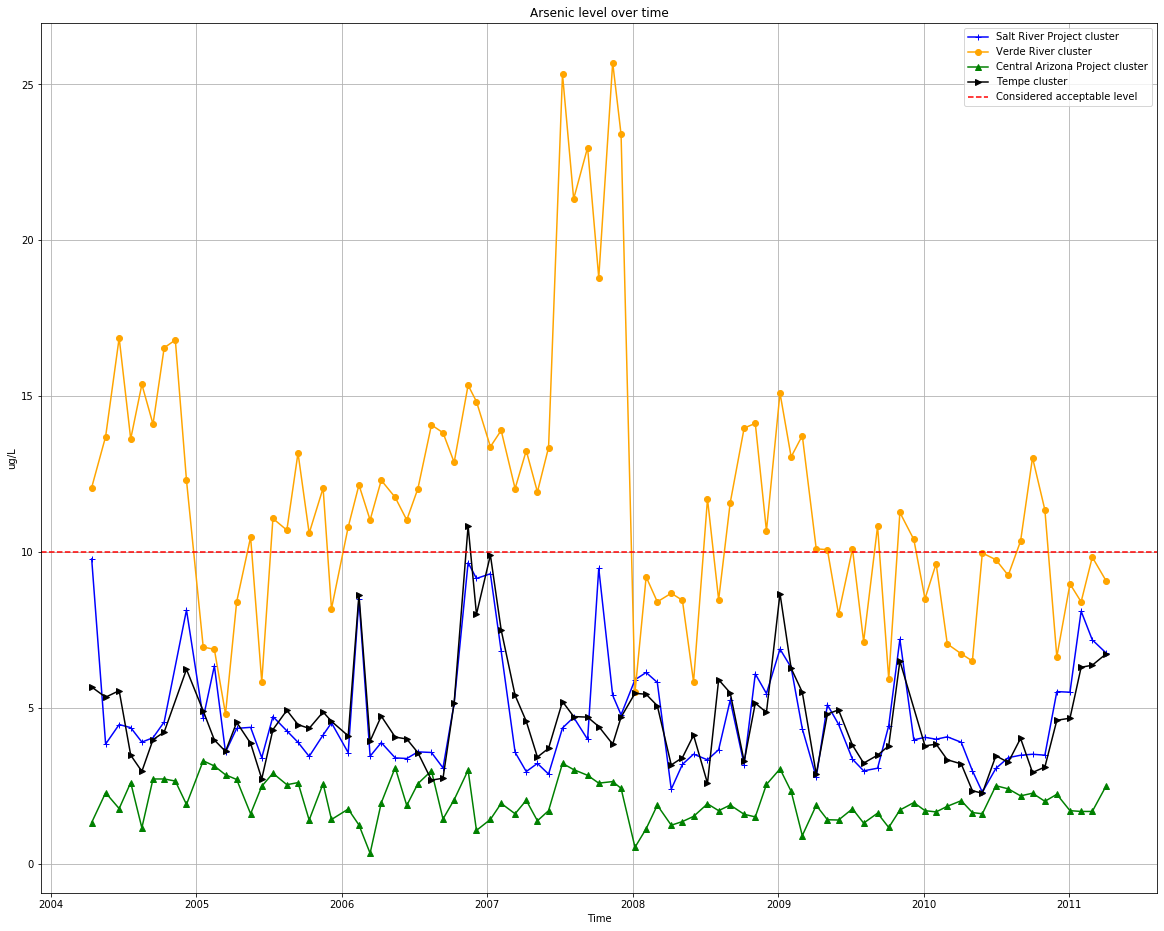

In [15]:
just_arsenic = arsenic[["Site Number", "Site location", "Cluster", "Arsenic (ug/L)", "date"]]
just_arsenic = just_arsenic.dropna()
verde = just_arsenic.loc[just_arsenic["Cluster"] == "verde"]
salt = just_arsenic.loc[just_arsenic["Cluster"] == "salt"]
cap = just_arsenic.loc[just_arsenic["Cluster"] == "cap"]
tempe = just_arsenic.loc[just_arsenic["Cluster"] == "tempe"]
srp = just_arsenic.loc[just_arsenic["Cluster"] == "srp"]

# extracts the date that sampling was done for each cluster
cap_dates = cap["date"].unique()
verde_dates = verde["date"].unique()
salt_dates = salt["date"].unique()
tempe_dates = tempe["date"].unique()
srp_dates = srp["date"].unique()

# formats date information to be read by python as datetime
x_cap = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in cap_dates]
x_verde = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in verde_dates]
x_salt = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in salt_dates]
x_tempe = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in tempe_dates]
x_srp = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in srp_dates]


# creates a series of averages arsenic level per waterway cluster
mean_arsenic_cap = cap.groupby("date").mean()["Arsenic (ug/L)"]
mean_arsenic_salt = salt.groupby("date").mean()["Arsenic (ug/L)"]
mean_arsenic_srp = srp.groupby("date").mean()["Arsenic (ug/L)"]
mean_arsenic_verde = verde.groupby("date").mean()["Arsenic (ug/L)"]
mean_arsenic_tempe = tempe.groupby("date").mean()["Arsenic (ug/L)"]

#plots the chart
plt.figure(figsize=(20,16))

plt.plot(x_srp, mean_arsenic_srp, marker="+", color="blue", label="Salt River Project cluster")
plt.plot(x_verde, mean_arsenic_verde, marker="o", color="orange", label="Verde River cluster")
plt.plot(x_cap, mean_arsenic_cap, marker="^", color="green", label="Central Arizona Project cluster")
plt.plot(x_tempe, mean_arsenic_tempe, marker=">", color="black", label="Tempe cluster")
plt.axhline(y=10, c='red', linestyle='dashed', label="Considered acceptable level")
plt.title("Arsenic level over time")
plt.xlabel("Time")
plt.ylabel("ug/L")
plt.legend(loc = "best")
plt.grid()
plt.savefig('Pictures/arsenic.png')

#### Algae - measuring conductance in a body of water.

This chart is a measure of algae in the water. Measuring algae is accomplished by studying the conductance of the water. Pure water is actually an insulator, as the water becomes more contaminated it actually becomes more conductive. Therefore, the higher the conductance of the water, the more contaminated the water is. This line graph attempts to analyze the mean conductance of each cluster over a period of time between 2012 - 2017. What we can see here is that according to our analysis this is a tale of two outcomes. The first being that SRP, Arizona Canal, and Tempe follow the same yearly rise and fall. At the same time the Verde river cluster and Central Arizona Project are much more stable throughout the year. I would hypothisize that the locations and use of these clusters have an effect on the algae content in the water. Next steps for this would be mapping out each cluster to see exactly where they flow. When that's known we can drill down into each cluster, like in the case of arsenic to see if there are any hotspots in terms of algae growth that would affect the data. 

In [16]:
algae.head(100)
conductance = algae[["site number", "site location", "Cluster", "date", "conductance (uS/cm)"]]
conductance=conductance.dropna()
conductance.count()
cond_cluster = conductance["Cluster"].unique()
tempe_cluster = conductance.loc[conductance["Cluster"] == "tempe"]
#tempe_cluster['site location'].unique()

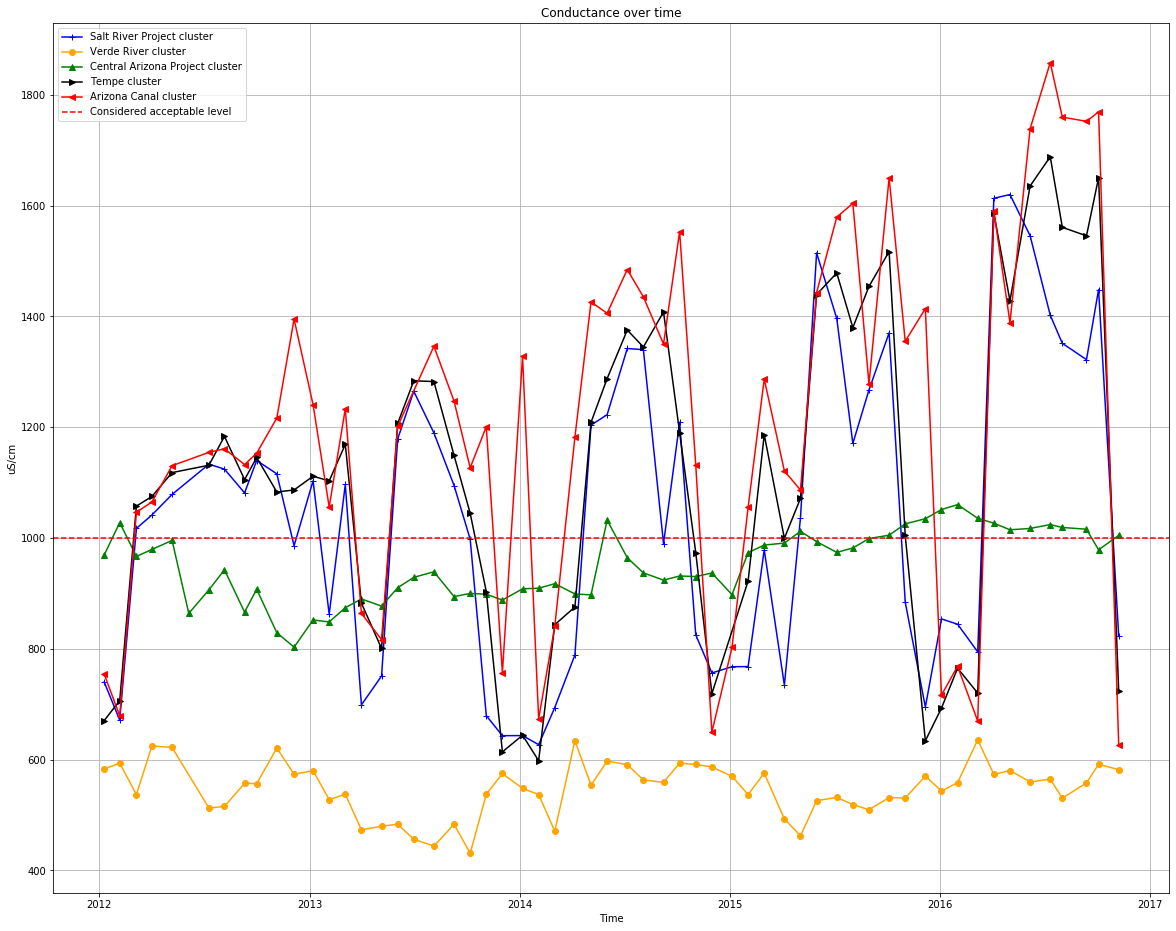

In [17]:
# Sets variables for each cluster to find the conductance of the water over the course of the study
# 
# Individual plots can be turned off and on by commenting out the plt.plot lines 
# Time can be adjusted in this line - md_conductance = conductance.loc[conductance["date"] >= "2012-01-01"]
# Plots line graph over the date range 
#

# extracts data for each waterway cluster
md_conductance = conductance.loc[conductance["date"] >= "2012-01-01"]
verde = md_conductance.loc[md_conductance["Cluster"] == "verde"]
salt = md_conductance.loc[md_conductance["Cluster"] == "salt"]
cap = md_conductance.loc[md_conductance["Cluster"] == "cap"]
tempe = md_conductance.loc[md_conductance["Cluster"] == "tempe"]
az_canal = md_conductance.loc[md_conductance["Cluster"] == "az canal"]
srp = md_conductance.loc[md_conductance["Cluster"] == "srp"]

# extracts the date that sampling was done for each cluster
cap_dates = cap["date"].unique()
verde_dates = verde["date"].unique()
salt_dates = salt["date"].unique()
tempe_dates = tempe["date"].unique()
az_canal_dates = az_canal["date"].unique()
srp_dates = srp["date"].unique()

# formats date information to be read by python as datetime
x_cap = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in cap_dates]
x_verde = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in verde_dates]
x_salt = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in salt_dates]
x_tempe = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in tempe_dates]
x_az_canal = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in az_canal_dates]
x_srp = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in srp_dates]

# creates a series of averages conductances per waterway cluster
mean_cond_cap = cap.groupby("date").mean()["conductance (uS/cm)"]
mean_cond_salt = salt.groupby("date").mean()["conductance (uS/cm)"]
mean_cond_srp = srp.groupby("date").mean()["conductance (uS/cm)"]
mean_cond_verde = verde.groupby("date").mean()["conductance (uS/cm)"]
mean_cond_tempe = tempe.groupby("date").mean()["conductance (uS/cm)"]
mean_cond_az_canal = az_canal.groupby("date").mean()["conductance (uS/cm)"]

#plots the chart
plt.figure(figsize=(20,16))
plt.plot(x_srp, mean_cond_srp, marker="+", color="blue", label="Salt River Project cluster")
plt.plot(x_verde, mean_cond_verde, marker="o", color="orange", label="Verde River cluster")
plt.plot(x_cap, mean_cond_cap, marker="^", color="green", label="Central Arizona Project cluster")
plt.plot(x_tempe, mean_cond_tempe, marker=">", color="black", label="Tempe cluster")
plt.plot(x_az_canal, mean_cond_az_canal, marker="<", color="red", label="Arizona Canal cluster")
plt.axhline(y=1000, c='red', linestyle='dashed', label="Considered acceptable level")
plt.title("Conductance over time")
plt.xlabel("Time")
plt.ylabel("uS/cm")
plt.legend(loc = "best")
plt.grid()
plt.savefig('Pictures/conductance.png')

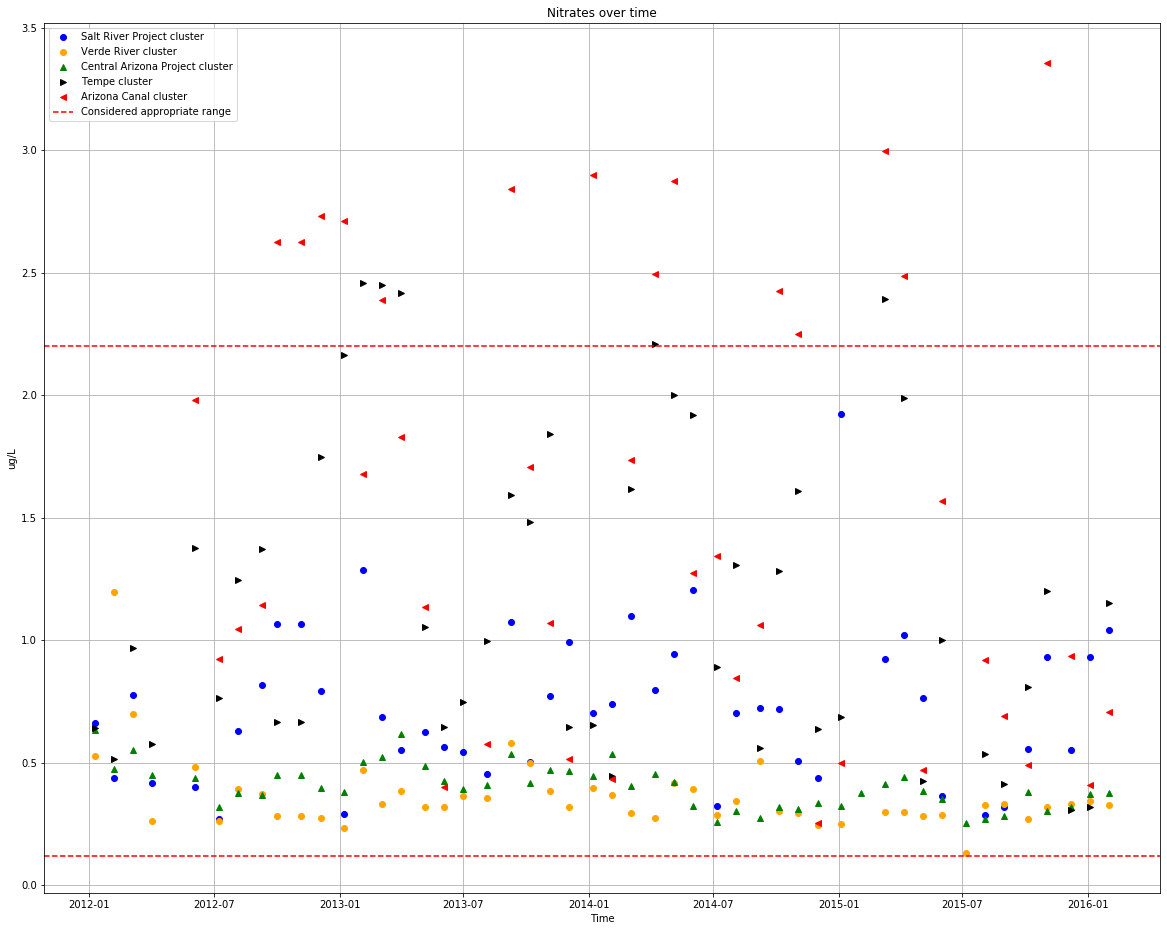

In [18]:
nitrogen["Cluster"].unique()
# extract our data segments to measure. 
nitrogen_t = nitrogen.loc[nitrogen["date"] >= "2012-01-01"]
verde = nitrogen_t.loc[nitrogen_t["Cluster"] == "verde"]
salt = nitrogen_t.loc[nitrogen_t["Cluster"] == "salt"]
cap = nitrogen_t.loc[nitrogen_t["Cluster"] == "cap"]
tempe = nitrogen_t.loc[nitrogen_t["Cluster"] == "tempe"]
az_canal = nitrogen_t.loc[nitrogen_t["Cluster"] == "az canal"]
srp = nitrogen_t.loc[nitrogen_t["Cluster"] == "srp"]
other = nitrogen_t.loc[nitrogen_t["Cluster"] == "NAN"]

# extracts the date that sampling was done for each cluster
cap_dates = cap["date"].unique()
verde_dates = verde["date"].unique()
salt_dates = salt["date"].unique()
tempe_dates = tempe["date"].unique()
az_canal_dates = az_canal["date"].unique()
srp_dates = srp["date"].unique()

# formats date information to be read by python as datetime
x_cap = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in cap_dates]
x_verde = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in verde_dates]
x_salt = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in salt_dates]
x_tempe = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in tempe_dates]
x_az_canal = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in az_canal_dates]
x_srp = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in srp_dates]

# creates a series of averages conductances per waterway cluster
mean_n_cap = cap.groupby("date").mean()["total_dissolved_nitrogen"]
mean_n_salt = salt.groupby("date").mean()["total_dissolved_nitrogen"]
mean_n_srp = srp.groupby("date").mean()["total_dissolved_nitrogen"]
mean_n_verde = verde.groupby("date").mean()["total_dissolved_nitrogen"]
mean_n_tempe = tempe.groupby("date").mean()["total_dissolved_nitrogen"]
mean_n_az_canal = az_canal.groupby("date").mean()["total_dissolved_nitrogen"]

#plots the chart
plt.figure(figsize=(20,16))
plt.plot(x_srp, mean_n_srp, linewidth=0, marker="o", color="blue", label="Salt River Project cluster")
plt.plot(x_verde, mean_n_verde, linewidth=0, marker="o", color="orange", label="Verde River cluster")
plt.plot(x_cap, mean_n_cap, linewidth=0, marker="^", color="green", label="Central Arizona Project cluster")
plt.plot(x_tempe, mean_n_tempe, linewidth=0, marker=">", color="black", label="Tempe cluster")
plt.plot(x_az_canal, mean_n_az_canal, linewidth=0, marker="<", color="red", label="Arizona Canal cluster")
plt.axhline(y=0.12, c='red', linestyle='dashed')
plt.axhline(y=2.2, c='red', linestyle='dashed', label="Considered appropriate range")
plt.title("Nitrates over time")
plt.xlabel("Time")
plt.ylabel("ug/L")
plt.legend(loc = "best")
plt.grid()
plt.savefig('Pictures/nitrogen.png')

Quarterly Metals - measuring the amount of heavy metals in local lakes.

This data looks like the bigger lakes in the state being tested for 27 different elements over a 3 year period. What this does is

Year 1 is 0.07018749999999997, Year 2 is 0.052875000000000005, Year 3 is 0.076875
Year 1 is 10.435437499999999, Year 2 is 2.1935625, Year 3 is 3.4472499999999995


Text(0, 0.5, 'Level ug/L')

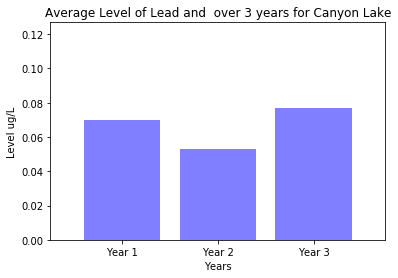

In [19]:
# Rename symbol and atomic number of elements for readablity.
metals_name_full = metals.rename(columns={"7Li":"Lithium","9Be":"Beryllium","23Na":"Sodium","24Mg":"Magnesium",
                                          "27Al":"Aluminum","39K":"Potassium","44Ca":"Calcium","51V":"Vanadium",
                                            "52Cr":"Chromium","55Mn":"Manganese","56Fe":"Iron","59Co":"Cobalt",
                                            "60Ni":"Nickel","65Cu":"Copper","66Zn" : "Zinc","75As":"Arsenic","82Se":"Selenium",
                                            "88Sr" : "Stronium","95Mo":"Molydenum","107Ag":"Silver","111Cd":"Cadmium","115In":"Indium",
                                            "121Sb":"Antimony","138Ba":"Barium","202Hg":"Mercury","208Pb":"Lead",
                                            "238U":"Uranium"})

#  Variables to sort datapoints by the Site Name field. This will produce the test results for each 
#  site. For the most part there are 13 different datapoints per site. 

APA1A = metals_name_full.loc[metals_name_full["Site Name"] == "APA1A"]
APA1B = metals_name_full.loc[metals_name_full["Site Name"] == "APA1B"]
APA2A = metals_name_full.loc[metals_name_full["Site Name"] == "APA2A"]
APA2B = metals_name_full.loc[metals_name_full["Site Name"] == "APA2B"]
CAN1A = metals_name_full.loc[metals_name_full["Site Name"] == "Can1A"]
CAN1B = metals_name_full.loc[metals_name_full["Site Name"] == "Can1B"]
CAN2A = metals_name_full.loc[metals_name_full["Site Name"] == "Can2A"]
CAN2B = metals_name_full.loc[metals_name_full["Site Name"] == "Can2B"]
ROOS1A = metals_name_full.loc[metals_name_full["Site Name"] == "Roos1A"]
ROOS1B = metals_name_full.loc[metals_name_full["Site Name"] == "Roos1B"]
ROOS2A = metals_name_full.loc[metals_name_full["Site Name"] == "Roos2A"]
ROOS2B = metals_name_full.loc[metals_name_full["Site Name"] == "Roos2B"]
Hav = metals_name_full.loc[metals_name_full["Site Name"] == "Hav"]
R10 = metals_name_full.loc[metals_name_full["Site Name"] == "R10"]
R25 = metals_name_full.loc[metals_name_full["Site Name"] == "R25"]
R2A = metals_name_full.loc[metals_name_full["Site Name"] == "R2A"]
R3 = metals_name_full.loc[metals_name_full["Site Name"] == "R3"]


apache = metals_name_full.loc[(metals_name_full["Site Name"] == "APA1A") | (metals_name_full["Site Name"] == "APA1B") |
                             (metals_name_full["Site Name"] == "APA2A") | (metals_name_full["Site Name"] == "APA2B")]
                             
canyon = metals_name_full.loc[(metals_name_full["Site Name"] == "Can1A") | (metals_name_full["Site Name"] == "Can1B") |
                             (metals_name_full["Site Name"] == "Can2A") | (metals_name_full["Site Name"] == "Can2B") ]

roosevelt = metals_name_full.loc[(metals_name_full["Site Name"] == "Roos1A") | (metals_name_full["Site Name"] == "Roos1B") |
                             (metals_name_full["Site Name"] == "Roos2A") | (metals_name_full["Site Name"] == "Roos2B") ]

# sets a variable to be plugged into the line of code to generate a data frame listing the more
# well known contaminants. This is done for usibility. 

sitename = apache

metals_common = sitename[["date","Site Name","Manganese","Lead","Arsenic","Chromium","Copper","Nickel","Aluminum"]]
metals_common

apache_common = apache[["date","Site Name","Manganese","Lead","Arsenic","Chromium","Copper","Nickel","Aluminum","Mercury"]]
canyon_common = canyon[["date","Site Name","Manganese","Lead","Arsenic","Chromium","Copper","Nickel","Aluminum","Mercury"]]
roosevelt_common = roosevelt[["date","Site Name","Manganese","Lead","Arsenic","Chromium","Copper","Nickel","Aluminum","Mercury"]]

roos_y1 = roosevelt.loc[roosevelt["date"] <= "2013-08-07"]
roos_y2 = roosevelt.loc[(roosevelt["date"] >= "2013-11-06") & (roosevelt["date"] <= "2014-08-05")]
roos_y3 = roosevelt.loc[roosevelt["date"] > "2014-08-05"]


apache_y1 = apache.loc[apache["date"] <= "2013-08-07"]
apache_y2 = apache.loc[(apache["date"] >= "2013-11-06") & (apache["date"] <= "2014-08-05")]
apache_y3 = apache.loc[apache["date"] > "2014-08-05"]

canyon_y1 = canyon.loc[canyon["date"] <= "2013-08-07"]
canyon_y2 = canyon.loc[(canyon["date"] >= "2013-11-06") & (canyon["date"] <= "2014-08-05")]
canyon_y3 = canyon.loc[canyon["date"] > "2014-08-05"]

substance_y1 = metals_name_full.loc[metals_name_full["date"] <= "2013-08-07"]
substance_y2 = metals_name_full.loc[(metals_name_full["date"] >= "2013-11-06") & (metals_name_full["date"] <= "2014-08-05")]
substance_y3 = metals_name_full.loc[metals_name_full["date"] > "2014-08-05"]

#results = metals_name_full[substance]

# Set the lake/year and column
       
substance1_1 = canyon_y1["Lead"].mean()
substance1_2 = canyon_y2["Lead"].mean()
substance1_3 = canyon_y3["Lead"].mean()

substance2_1 = canyon_y1["Copper"].mean()
substance2_2 = canyon_y2["Copper"].mean()
substance2_3 = canyon_y3["Copper"].mean()

print(f'Year 1 is {substance1_1}, Year 2 is {substance1_2}, Year 3 is {substance1_3}')
print(f'Year 1 is {substance2_1}, Year 2 is {substance2_2}, Year 3 is {substance2_3}') 

# set lake for title
can = "Canyon Lake"
roo = "Roosevelt Lake"
apa = "Apache Lake"

lake = can
toxin1 = "Lead"


# Create an array that contains the number of users each language has
substance01 = [substance1_1, substance1_2, substance1_3]
substance02 = [substance2_1, substance2_2, substance2_3]
x_axis = ["Year 1", "Year 2", "Year 3"]

# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, substance01, color='b', alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, ["Year 1", "Year 2", "Year 3"])

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(substance01)+0.05)

# Give our chart some labels and a tile
plt.title(f"Average Level of {toxin1} and  over 3 years for {lake}")
plt.xlabel("Years")
plt.ylabel("Level ug/L")

# Mapping the water sources feeding the valley

Using the Google Maps API, we searched for the coordinates of the water sources in the data samples we found
Showing the Arsenic values with a heatmap by the location where they were collected.
Display map of the main reservoirs serving the Phoenix area. 

In [20]:
arsenic_heat = arsenic.loc[arsenic["date"] == "2004-04-13"]
arsenic_heat = arsenic_heat[["Site location", "Arsenic (ug/L)"]]
#Center google API search in Phoenix
target_coordinates = "33.448376, -112.074036"
radius = 5000000

#Set up parameters for gmaps API
params = {
    "location": target_coordinates,
    "keyword": "",
    "radius": radius,
    "key": gkey
}

base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
#create dataframe for the latitude and longitudes of each destination
salt_locations = pd.DataFrame(columns = ["Name", "Lat", "Lng"])
for site in arsenic["Site location"].unique():
    try:
        params["keyword"] = site
        response_json = requests.get(base_url, params=params).json()
        location = {"Name": site, "Lat": response_json["results"][0]["geometry"]["location"]["lat"],
                   "Lng": response_json["results"][0]["geometry"]["location"]["lng"]}
        salt_locations = salt_locations.append(location,ignore_index=True)
        print(f"Adding {site}")
    except:
        print(f"No location data found for {site}")

Adding Greenway Water Treatment Plant
No location data found for Lake havasu
Adding Tempe Canal
Adding Granite Reef Recreational Area
Adding tempe canal
Adding Arizona Canal
Adding Blue Point Bridge
No location data found for Bill Williams River National Wildlife Refuge Visitors Center
Adding Steele Indian School Park
Adding 24th Street Water Treatment Plant
Adding Deer Valley Water treatment plant
Adding Deer Valley water treatment plant
Adding Val Vista Water Treatment Plant
No location data found for horseshoe reservoir AZ
Adding Arizona Falls
Adding verde river at beeline highway
No location data found for Lake Pleasant integrated sample
No location data found for Waddell Canal
Adding bartlett lake 
No location data found for Saguaro Lake
Adding park of the canals
Adding South Tempe Water Plant
Adding Union Hills Inlet
Adding Union Hills Treated Water
Adding Salt River below Saguaro (Blue Point Bridge)
Adding Val Vista Water Treatment Plant-West
Adding west area WRF
Adding West Are

In [21]:
salt_locations = salt_locations.rename(columns = {"Name": "Site location"})
salt_locations_heat = arsenic_heat.merge(salt_locations, on="Site location", how="outer")
salt_locations_heat = salt_locations_heat.dropna()
coordinates = salt_locations_heat[["Lat","Lng"]]

In [22]:
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
     'margin': '0 auto 0 auto'
}
rating = salt_locations_heat["Arsenic (ug/L)"].astype(float)
heat_layer = gmaps.heatmap_layer(coordinates, weights=rating, 
                                 dissipating=False, max_intensity=30,
                                 point_radius=.05)

fig = gmaps.figure(layout=figure_layout, map_type="HYBRID")  # Assign the marker layer to a variable
markers = gmaps.marker_layer(coordinates)
# Add the layer to the map
fig.add_layer(markers)
# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

Reading API from https://maps.googleapis.com/maps/api/place/nearbysearch/json
Adding Canyon Lake, lower
Adding Canyon Lake, upper
Adding Lake Pleasant integrated sample
Adding Salt River below Saguaro (Blue Point Bridge)
Could not locate Theodore Roosevelt Dam
Could not locate apache lake
Could not locate central arizona project
Could not locate lake havasu state park
Adding theodore roosevelt lake, lower
Adding theodore roosevelt lake, upper
Adding verde river at beeline highway


Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…